# **PROJECT :**

## **HOUSING CASE STUDY**

> Analysis of the housing dataset to understand the key factors influencing house prices and property characteristics. <br>
> Method of analysis : **Exploratory Data Analysis (EDA)**

### **Objective**

To identify the major factors driving house prices and provide actionable insights for buyers, sellers, and policymakers.

## **Four major parts of this project :**

> 1. Data Understanding
> 2. Data Cleaning
> 3. Feature Engineering
> 4. Data Analysis
> 5. Key Insights
> 6. Recommendations


# **1. Dataset Understanding**

Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import scipy.stats as stats
from scipy.stats import chi2_contingency, chi2


Loading and Reading the Dataset

In [2]:
House = pd.read_csv('housing.csv')

In [3]:
House.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/2014 0:00   313000.0         3       1.50       1340.0       NaN   
1  02/05/2014 0:00  2384000.0         5       2.50       3650.0       NaN   
2  02/05/2014 0:00   342000.0         3       2.00       1930.0       NaN   
3  02/05/2014 0:00   420000.0         3       2.25       2000.0       NaN   
4  02/05/2014 0:00   550000.0         4       2.50       1940.0       NaN   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0    1955.0   
1     2.0           0     4          5        3370            280    1921.0   
2     1.0           0     0          4        1930              0    1966.0   
3     1.0           0     0          4        1000           1000    1963.0   
4     1.0           0     0          4        1140            800    1976.0   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

Shape of the dataset (rows, columns)

In [4]:
House.shape

(4600, 18)

Information about the dataset

In [5]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Description of dataset


In [6]:
House.describe(include= 'all')

date         price     bedrooms    bathrooms   sqft_living  \
count              4600  4.600000e+03  4600.000000  4600.000000   4560.000000   
unique               70           NaN          NaN          NaN           NaN   
top     23/06/2014 0:00           NaN          NaN          NaN           NaN   
freq                142           NaN          NaN          NaN           NaN   
mean                NaN  5.539483e+05     3.400870     2.160815   2138.935526   
std                 NaN  5.808371e+05     0.908848     0.783781    965.011449   
min                 NaN  0.000000e+00     0.000000     0.000000    370.000000   
25%                 NaN  3.225000e+05     3.000000     1.750000   1460.000000   
50%                 NaN  4.610000e+05     3.000000     2.250000   1980.000000   
75%                 NaN  6.550000e+05     4.000000     2.500000   2620.000000   
max                 NaN  2.659000e+07     9.000000     8.000000  13540.000000   

            sqft_lot       floors   waterfront         view    condition  \
count   4.586000e+03  4600.000000  4600.000000  4600.000000  4600.000000   
unique           NaN          NaN          NaN          NaN          NaN   
top              NaN          NaN          NaN          NaN          NaN   
freq             NaN          NaN          NaN          NaN          NaN   
mean    1.485981e+04     1.512065     0.007174     0.240652     3.451739   
std     3.592050e+04     0.538288     0.084404     0.778405     0.677230   
min     6.380000e+02     1.000000     0.000000     0.000000     1.000000   
25%     5.000000e+03     1.000000     0.000000     0.000000     3.000000   
50%     7.683500e+03     1.500000     0.000000     0.000000     3.000000   
75%     1.101850e+04     2.000000     0.000000     0.000000     4.000000   
max     1.074218e+06     3.500000     1.000000     4.000000     5.000000   

          sqft_above  sqft_basement     yr_built  yr_renovated  \
count    4600.000000    4600.000000  4577.000000   4600.000000   
unique           NaN            NaN          NaN           NaN   
top              NaN            NaN          NaN           NaN   
freq             NaN            NaN          NaN           NaN   
mean     1840.825435     312.081522  1970.808827    808.608261   
std       970.705795     464.137228    29.724793    979.414536   
min       350.000000       0.000000  1900.000000      0.000000   
25%      1190.000000       0.000000  1951.000000      0.000000   
50%      1590.000000       0.000000  1976.000000      0.000000   
75%      2300.000000     610.000000  1997.000000   1999.000000   
max     20450.000000    4820.000000  2014.000000   2014.000000   

                       street     city  statezip country  
count                    4600     4543      4600    4600  
unique                   4525       44        77       1  
top     2520 Mulberry Walk NE  Seattle  WA 98103     USA  
freq                        4     1555       148    4600  
mean                      NaN      NaN       NaN     NaN  
std                       NaN      NaN       NaN     NaN  
min                       NaN      NaN       NaN     NaN  
25%                       NaN      NaN       NaN     NaN  
50%                       NaN      NaN       NaN     NaN  
75%                       NaN      NaN       NaN     NaN  
max                       NaN      NaN       NaN     NaN

Variables in dataset


In [7]:
set(House)

{'bathrooms',
 'bedrooms',
 'city',
 'condition',
 'country',
 'date',
 'floors',
 'price',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_lot',
 'statezip',
 'street',
 'view',
 'waterfront',
 'yr_built',
 'yr_renovated'}

Count of missing values in each column

In [8]:
House.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [9]:
House.isnull().sum().sum()

np.int64(134)

In [10]:
# Percentage of missing values in each column corresponding to total number of records

round(100*(House.isnull().sum()/len(House.index)), 2).sort_values(ascending=False)

# (889/39717)*100

city             1.24
sqft_living      0.87
yr_built         0.50
sqft_lot         0.30
price            0.00
date             0.00
floors           0.00
waterfront       0.00
bathrooms        0.00
bedrooms         0.00
condition        0.00
view             0.00
sqft_basement    0.00
sqft_above       0.00
yr_renovated     0.00
street           0.00
statezip         0.00
country          0.00
dtype: float64

# **2. Data Cleaning**

## **Unique values in each columns**

In [11]:
House.apply(lambda x: len(x.unique()))

date               70
price            1743
bedrooms           10
bathrooms          26
sqft_living       567
sqft_lot         3106
floors              6
waterfront          2
view                5
condition           5
sqft_above        518
sqft_basement     207
yr_built          116
yr_renovated       60
street           4525
city               45
statezip           77
country             1
dtype: int64

In [12]:
House.apply(lambda x: x.unique())

date             [02/05/2014 0:00, 03/05/2014 0:00, 04/05/2014 ...
price            [313000.0, 2384000.0, 342000.0, 420000.0, 5500...
bedrooms                            [3, 5, 4, 2, 6, 7, 9, 1, 8, 0]
bathrooms        [1.5, 2.5, 2.0, 2.25, 1.0, 1.75, 2.75, 3.0, 3....
sqft_living      [1340.0, 3650.0, 1930.0, 2000.0, 1940.0, 880.0...
sqft_lot         [nan, 9480.0, 9720.0, 6700.0, 7231.0, 15878.0,...
floors                              [1.5, 2.0, 1.0, 2.5, 3.0, 3.5]
waterfront                                                  [0, 1]
view                                               [0, 4, 1, 2, 3]
condition                                          [3, 5, 4, 2, 1]
sqft_above       [1340, 3370, 1930, 1000, 1140, 880, 1350, 2710...
sqft_basement    [0, 280, 1000, 800, 860, 1010, 360, 690, 470, ...
yr_built         [1955.0, 1921.0, 1966.0, 1963.0, 1976.0, 1938....
yr_renovated     [2005, 0, 1992, 1994, 2010, 1988, 2009, 1969, ...
street           [18810 Densmore Ave N, 709 W Blaine St, 26206

## **Standardizing Value**

### **Convert categorical features & make them readable**

In [13]:
# Convert to object (categorical) type
House['waterfront'] = House['waterfront'].astype('object')
House['view'] = House['view'].astype('object')
House['condition'] = House['condition'].astype('object')

# Replace 0/1 in 'waterfront' with No/Yes
House['waterfront'] = House['waterfront'].replace({0: 'No', 1: 'Yes'})  # handles integer values

# Check the unique values after mapping
print("Waterfront unique values:", House['waterfront'].unique())
print("View unique values:", House['view'].unique())
print("Condition unique values:", House['condition'].unique())

#Rounding .2d the sqft_lot
House['sqft_lot'] = House['sqft_lot'].round(2)


Waterfront unique values: ['No' 'Yes']
View unique values: [0 4 1 2 3]
Condition unique values: [3 5 4 2 1]


### **Converting Date from Object to Datetime**

In [14]:
#Covert Date datatype from object to datetime
House['date'] = pd.to_datetime(House['date'], dayfirst=True, errors='coerce')

In [15]:
House.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront               object
view                     object
condition                object
sqft_above                int64
sqft_basement             int64
yr_built                float64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

In [16]:
#displaying date, yr_built, yr_renovated
House['date']


0      2014-05-02
1      2014-05-02
2      2014-05-02
3      2014-05-02
4      2014-05-02
          ...    
4595   2014-07-09
4596   2014-07-09
4597   2014-07-09
4598   2014-07-10
4599   2014-07-10
Name: date, Length: 4600, dtype: datetime64[ns]

In [17]:
#displaying date, yr_built, yr_renovated
House[['date','yr_built','yr_renovated']].isnull().sum()

date             0
yr_built        23
yr_renovated     0
dtype: int64

### **Checking For Null Values & Replacing Them**

In [18]:
House.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [19]:
House.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront               object
view                     object
condition                object
sqft_above                int64
sqft_basement             int64
yr_built                float64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

In [20]:
#Replacing null values as per the datatype: Numeric->mean, String->mode
#Numeric Null Coulmns
House['sqft_living'].fillna(House['sqft_living'].mean(),inplace=True)
House['sqft_lot'].fillna(House['sqft_lot'].mean(),inplace=True)

#String Null Columns
House['city'].fillna(House['city'].mode()[0],inplace=True)

In [21]:
#Replacing null values in Year_built, Year_Renovation using mode
House['yr_built'].fillna(House['yr_built'].mode()[0],inplace=True)

In [22]:
House.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [23]:
House.shape

(4600, 18)

In [24]:
House

date         price  bedrooms  bathrooms  sqft_living      sqft_lot  \
0    2014-05-02  3.130000e+05         3       1.50       1340.0  14859.809856   
1    2014-05-02  2.384000e+06         5       2.50       3650.0  14859.809856   
2    2014-05-02  3.420000e+05         3       2.00       1930.0  14859.809856   
3    2014-05-02  4.200000e+05         3       2.25       2000.0  14859.809856   
4    2014-05-02  5.500000e+05         4       2.50       1940.0  14859.809856   
...         ...           ...       ...        ...          ...           ...   
4595 2014-07-09  3.081667e+05         3       1.75       1510.0   6360.000000   
4596 2014-07-09  5.343333e+05         3       2.50       1460.0   7573.000000   
4597 2014-07-09  4.169042e+05         3       2.50       3010.0   7014.000000   
4598 2014-07-10  2.034000e+05         4       2.00       2090.0   6630.000000   
4599 2014-07-10  2.206000e+05         3       2.50       1490.0   8102.000000   

      floors waterfront view condition  sqft_above  sqft_basement  yr_built  \
0        1.5         No    0         3        1340              0    1955.0   
1        2.0         No    4         5        3370            280    1921.0   
2        1.0         No    0         4        1930              0    1966.0   
3        1.0         No    0         4        1000           1000    1963.0   
4        1.0         No    0         4        1140            800    1976.0   
...      ...        ...  ...       ...         ...            ...       ...   
4595     1.0         No    0         4        1510              0    2006.0   
4596     2.0         No    0         3        1460              0    2006.0   
4597     2.0         No    0         3        3010              0    2006.0   
4598     1.0         No    0         3        1070           1020    2006.0   
4599     2.0         No    0         4        1490              0    2006.0   

      yr_renovated                    street       city  statezip country  
0             2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1                0           709 W Blaine St    Seattle  WA 98119     USA  
2                0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3                0           857 170th Pl NE   Bellevue  WA 98008     USA  
4             1992         9105 170th Ave NE    Redmond  WA 98052     USA  
...            ...                       ...        ...       ...     ...  
4595          1979            501 N 143rd St    Seattle  WA 98133     USA  
4596          2009          14855 SE 10th Pl   Bellevue  WA 98007     USA  
4597             0          759 Ilwaco Pl NE     Renton  WA 98059     USA  
4598             0         5148 S Creston St    Seattle  WA 98178     USA  
4599             0         18717 SE 258th St  Covington  WA 98042     USA  

[4600 rows x 18 columns]

## **Filteration :** (Ouliers Solving)

### **Boxplot With Outliers**

In [25]:
numeric_col = House.select_dtypes(include=['number'])
print(numeric_col.dtypes)

price            float64
bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
sqft_above         int64
sqft_basement      int64
yr_built         float64
yr_renovated       int64
dtype: object


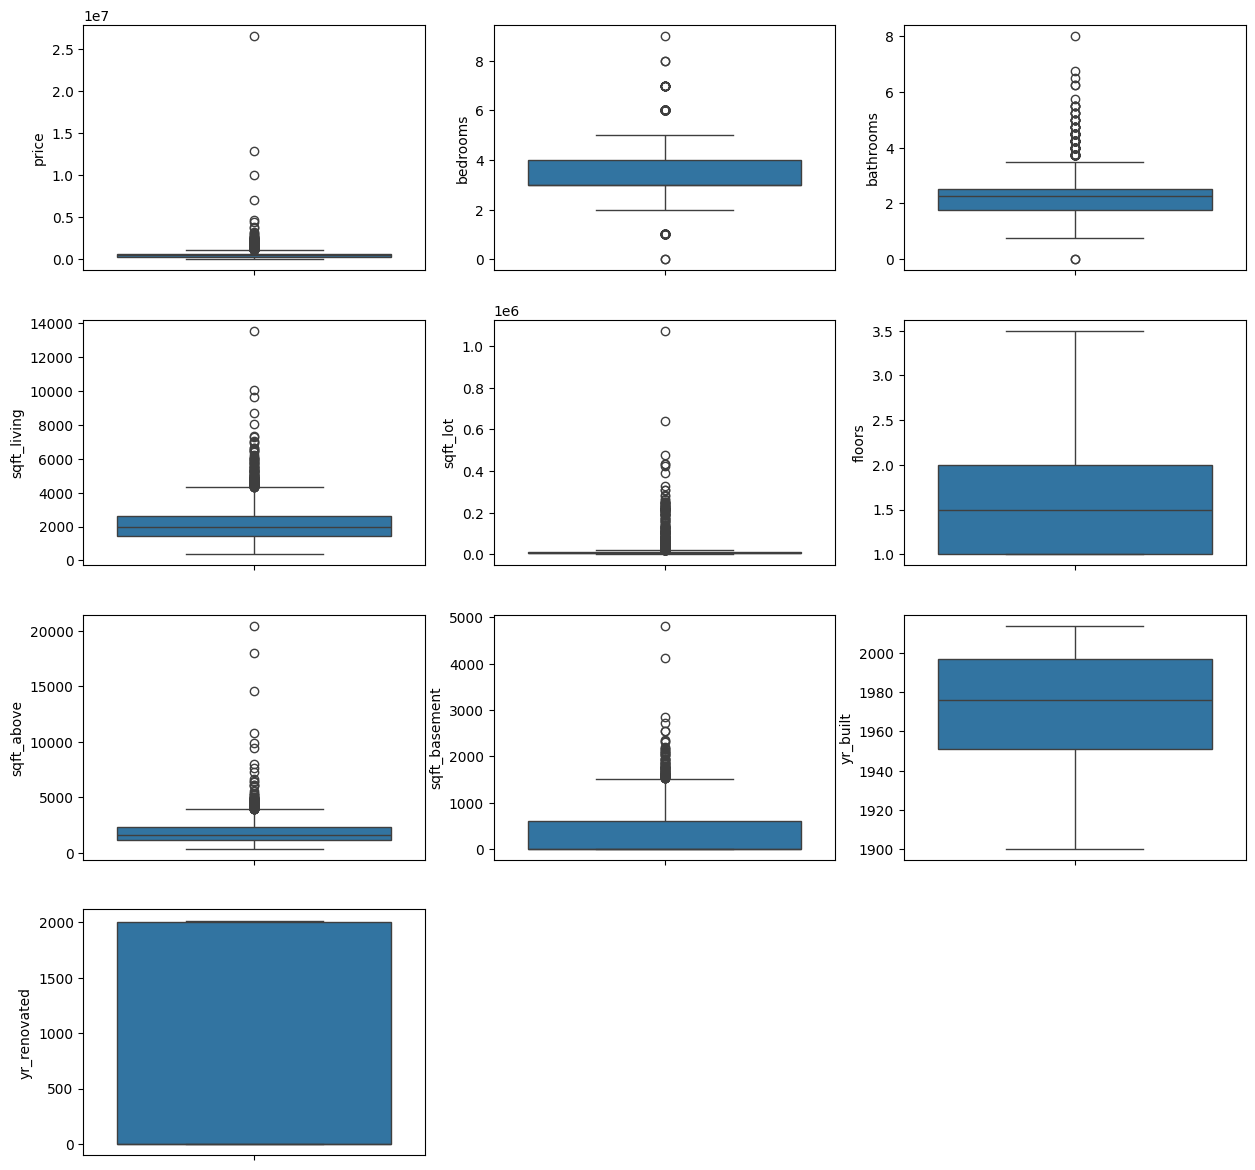

In [26]:
#Plotting Box Plot for numeric columns to check the outliers
plt.figure(figsize=(15,30))
for i in range(len(numeric_col.columns)):
  plt.subplot(8,3,i+1)
  sns.boxplot(y = numeric_col.columns[i],data = House)
plt.show()

### **Price Outliers Solving**

In [27]:
#Description of price column to check outliers
House['price'].describe()

count    4.600000e+03
mean     5.539483e+05
std      5.808371e+05
min      0.000000e+00
25%      3.225000e+05
50%      4.610000e+05
75%      6.550000e+05
max      2.659000e+07
Name: price, dtype: float64

In [28]:
#50% value = 4 and at 75% = 6. this indicates outlier
#Check which percentile the value distorts more, so we can remove it
print(f"At 75%, Price is {House['price'].quantile(0.75)}")
print(f"At 80%, Price is {House['price'].quantile(0.8)}")
print(f"At 90%, Price is {House['price'].quantile(0.9)}")
print(f"At 95%, Price is {House['price'].quantile(0.95)}")
print(f"At 99%, Price is {House['price'].quantile(0.99)}")
print(f"At 99%, Price is {House['price'].quantile(1.0)}")

At 75%, Price is 655000.0
At 80%, Price is 719200.0000000002
At 90%, Price is 900000.0
At 95%, Price is 1185000.05
At 99%, Price is 2027380.0000000084
At 99%, Price is 26590000.0


In [29]:
#the value distorts more at 75%, So lets drop the records where 'price>655000.0'
House = House[House['price']<655000.0]

In [30]:
#Check shape of dataset
House.shape

(3449, 18)

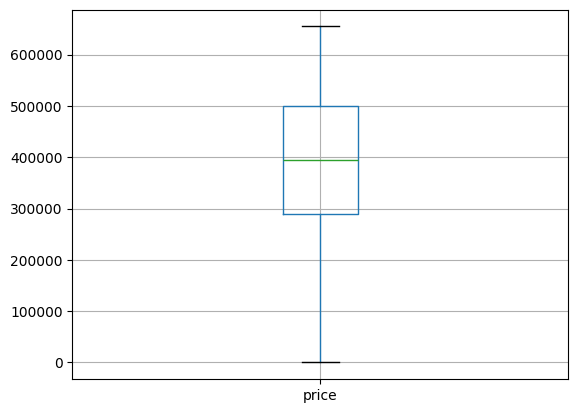

In [31]:
#Checking Outlier
House.boxplot(column=['price'])
plt.show()

### **Bedrooms Outliers Solving**

In [32]:
#Description of Bedrooms column to check outliers
House['bedrooms'].describe()

count    3449.000000
mean        3.253697
std         0.874194
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: bedrooms, dtype: float64

In [33]:
#75% value = 4 and at 100% = 9. this indicates outlier
#Check which percentile the value distorts more, so we can remove it
print(f"At 75%, Bedrooms is {House['bedrooms'].quantile(0.75)}")
print(f"At 80%, Bedrooms is {House['bedrooms'].quantile(0.8)}")
print(f"At 90%, Bedrooms is {House['bedrooms'].quantile(0.9)}")
print(f"At 95%, Bedrooms is {House['bedrooms'].quantile(0.95)}")
print(f"At 99%, Bedrooms is {House['bedrooms'].quantile(0.99)}")
print(f"At 100%, Bedrooms is {House['bedrooms'].quantile(1.0)}")

At 75%, Bedrooms is 4.0
At 80%, Bedrooms is 4.0
At 90%, Bedrooms is 4.0
At 95%, Bedrooms is 5.0
At 99%, Bedrooms is 6.0
At 100%, Bedrooms is 9.0


In [34]:
#the value distorts more at 100%, So lets drop the records where 'price>6.0'
House = House[House['bedrooms']<6.0]

In [35]:
#Check shape of dataset
House.shape

(3412, 18)

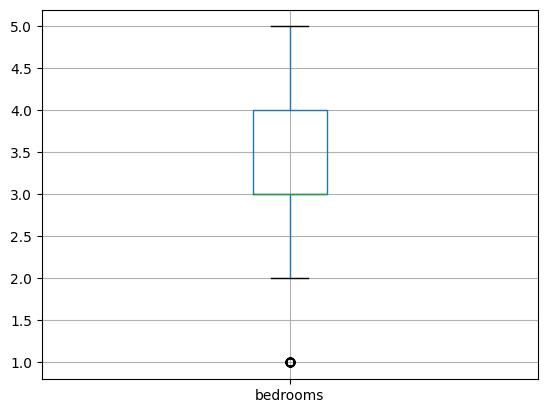

In [36]:
#Checking Outlier
House.boxplot(column=['bedrooms'])
plt.show()

### **Bathrooms Outliers Solving**

In [37]:
#Description of bathrooms column to check outliers
House['bathrooms'].describe()


count    3412.000000
mean        1.963877
std         0.671401
min         0.750000
25%         1.500000
50%         2.000000
75%         2.500000
max         6.250000
Name: bathrooms, dtype: float64

In [38]:
#75% value = 2.50 and at 100% = 6.25. this indicates outlier
#Check which percentile the value distorts more, so we can remove it
print(f"At 75%, Bathrooms is {House['bathrooms'].quantile(0.75)}")
print(f"At 80%, Bathrooms is {House['bathrooms'].quantile(0.8)}")
print(f"At 90%, Bathrooms is {House['bathrooms'].quantile(0.9)}")
print(f"At 95%, Bathrooms is {House['bathrooms'].quantile(0.95)}")
print(f"At 99%, Bathrooms is {House['bathrooms'].quantile(0.99)}")
print(f"At 100%, Bathrooms is {House['bathrooms'].quantile(1.0)}")

At 75%, Bathrooms is 2.5
At 80%, Bathrooms is 2.5
At 90%, Bathrooms is 2.75
At 95%, Bathrooms is 3.0
At 99%, Bathrooms is 3.5
At 100%, Bathrooms is 6.25


In [39]:
#the value distorts more at 100%, So lets drop the records where 'price>=3.5'
House = House[House['bathrooms']<=3.5]


In [40]:
#Check shape of dataset
House.shape

(3388, 18)

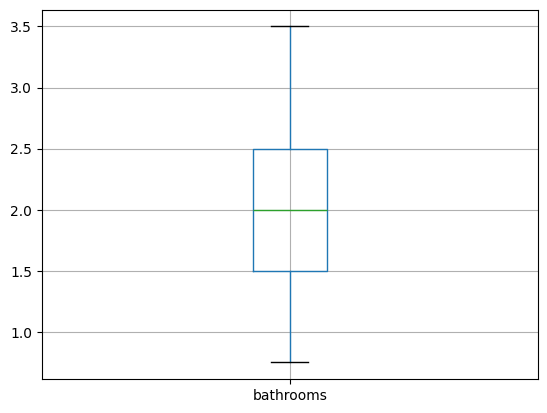

In [41]:
#Checking Outlier
House.boxplot(column=['bathrooms'])
plt.show()

### **Sqft_Living Outliers Solving**

In [42]:
#Description of sqft_living column to check outliers
House['sqft_living'].describe()

count    3388.000000
mean     1799.548959
std       636.046975
min       370.000000
25%      1320.000000
50%      1730.000000
75%      2180.000000
max      5960.000000
Name: sqft_living, dtype: float64

In [43]:
#75% value = 2180 and at 100% = 5960. this indicates outlier
#Check which percentile the value distorts more, so we can remove it
print(f"At 75%, Sqft_living is {House['sqft_living'].quantile(0.75)}")
print(f"At 80%, Sqft_living is {House['sqft_living'].quantile(0.8)}")
print(f"At 90%, Sqft_living is {House['sqft_living'].quantile(0.9)}")
print(f"At 95%, Sqft_living is {House['sqft_living'].quantile(0.95)}")
print(f"At 99%, Sqft_living is {House['sqft_living'].quantile(0.99)}")
print(f"At 100%, Sqft_living is {House['sqft_living'].quantile(1.0)}")

At 75%, Sqft_living is 2180.0
At 80%, Sqft_living is 2300.0
At 90%, Sqft_living is 2630.0
At 95%, Sqft_living is 2920.0
At 99%, Sqft_living is 3661.300000000001
At 100%, Sqft_living is 5960.0


In [44]:
#the value distorts more at 99%, So lets drop the records where 'sqft_living>=2920.0'
House = House[House['sqft_living']<=2920.0]


In [45]:
#Check shape of dataset
House.shape

(3222, 18)

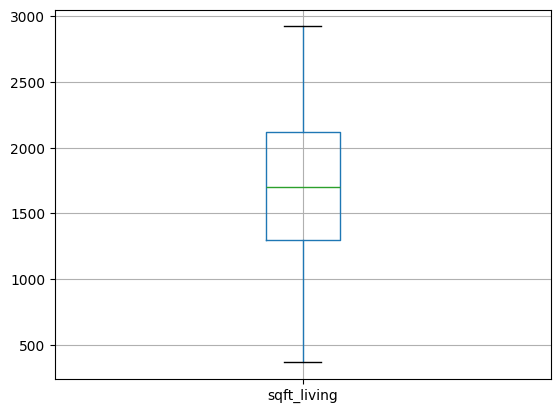

In [46]:
#Checking Outlier
House.boxplot(column=['sqft_living'])
plt.show()

### **Sqrt_Lot Outliers Solving**

In [47]:
#Description of sqft_lot column to check outliers
House['sqft_lot'].describe()

count      3222.000000
mean      12282.981350
std       26963.217682
min         638.000000
25%        4840.000000
50%        7400.000000
75%        9886.000000
max      435600.000000
Name: sqft_lot, dtype: float64

In [48]:
#75% value = 9886.000 and at 100% = 435600.0. this indicates outlier
#Check which percentile the value distorts more, so we can remove it
print(f"At 75%, Sqft_lot is {House['sqft_lot'].quantile(0.75)}")
print(f"At 80%, Sqft_lot is {House['sqft_lot'].quantile(0.8)}")
print(f"At 90%, Sqft_lot is {House['sqft_lot'].quantile(0.9)}")
print(f"At 95%, Sqft_lot is {House['sqft_lot'].quantile(0.95)}")
print(f"At 99%, Sqft_lot is {House['sqft_lot'].quantile(0.99)}")
print(f"At 100%, Sqft_lot is {House['sqft_lot'].quantile(1.0)}")

At 75%, Sqft_lot is 9886.0
At 80%, Sqft_lot is 10837.2
At 90%, Sqft_lot is 16910.60000000001
At 95%, Sqft_lot is 36697.949999999975
At 99%, Sqft_lot is 136576.52999999982
At 100%, Sqft_lot is 435600.0


In [49]:
#the value distorts more at 90%, So lets drop the records where 'sqft-lot>=10837.2'
House = House[House['sqft_lot']<=10837.2]

In [50]:
#Check shape of dataset
House.shape

(2577, 18)

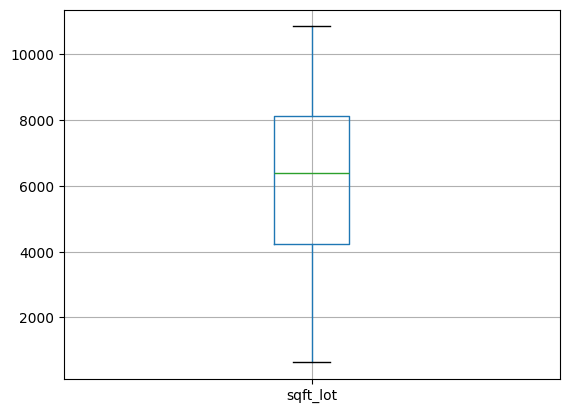

In [51]:
#Checking Outlier
House.boxplot(column=['sqft_lot'])
plt.show()

### **Sqft_Above Outliers Solving**

In [52]:
#Description of sqft_above column to check outliers
House['sqft_above'].describe()

count     2577.000000
mean      1468.206830
std        775.507321
min        350.000000
25%       1070.000000
50%       1320.000000
75%       1730.000000
max      20450.000000
Name: sqft_above, dtype: float64

In [53]:
#75% value = 1730.0 and at 100% = 20450.0 . this indicates outlier
#Check which percentile the value distorts more, so we can remove it
print(f"At 75%, Sqft_above is {House['sqft_above'].quantile(0.75)}")
print(f"At 80%, Sqft_above is {House['sqft_above'].quantile(0.8)}")
print(f"At 90%, Sqft_above is {House['sqft_above'].quantile(0.9)}")
print(f"At 95%, Sqft_above is {House['sqft_above'].quantile(0.95)}")
print(f"At 99%, Sqft_above is {House['sqft_above'].quantile(0.99)}")
print(f"At 100%, Sqft_above is {House['sqft_above'].quantile(1.0)}")

At 75%, Sqft_above is 1730.0
At 80%, Sqft_above is 1880.0
At 90%, Sqft_above is 2245.2000000000007
At 95%, Sqft_above is 2531.5999999999985
At 99%, Sqft_above is 2800.0
At 100%, Sqft_above is 20450.0


In [54]:
#the value distorts more at 95%, So lets drop the records where 'sqft_above>=2242.0'
House = House[House['sqft_above']<=2242.0]

In [55]:
#Check shape of dataset
House.shape

(2319, 18)

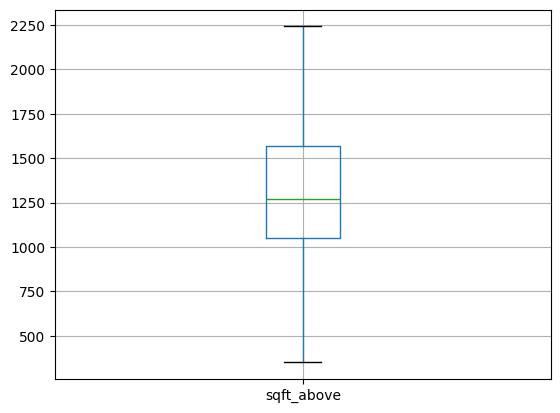

In [56]:
#Checking Outlier
House.boxplot(column=['sqft_above'])
plt.show()

### **Sqft_Basement Outliers Solving**

In [57]:
#Description of sqft_basement column to check outliers
House['sqft_basement'].describe()


count    2319.000000
mean      251.441138
std       356.847228
min         0.000000
25%         0.000000
50%         0.000000
75%       500.000000
max      1380.000000
Name: sqft_basement, dtype: float64

In [58]:
#75% value = 500.0 and at 100% = 1380.0. this indicates outlier
#Check which percentile the value distorts more, so we can remove it
print(f"At 75%, Sqft_basement is {House['sqft_basement'].quantile(0.75)}")
print(f"At 80%, Sqft_basement is {House['sqft_basement'].quantile(0.8)}")
print(f"At 90%, Sqft_basement is {House['sqft_basement'].quantile(0.9)}")
print(f"At 95%, Sqft_basement is {House['sqft_basement'].quantile(0.95)}")
print(f"At 99%, Sqft_basement is {House['sqft_basement'].quantile(0.99)}")
print(f"At 100%, Sqft_basement is {House['sqft_basement'].quantile(1.0)}")

At 75%, Sqft_basement is 500.0
At 80%, Sqft_basement is 600.0
At 90%, Sqft_basement is 840.0
At 95%, Sqft_basement is 980.0
At 99%, Sqft_basement is 1208.2000000000016
At 100%, Sqft_basement is 1380.0


In [59]:
#the value distorts more at 75%, So lets drop the records where 'sqft_basement>1210.0'
House = House[House['sqft_basement']<=1210.0]

In [60]:
#Check shape of dataset
House.shape

(2297, 18)

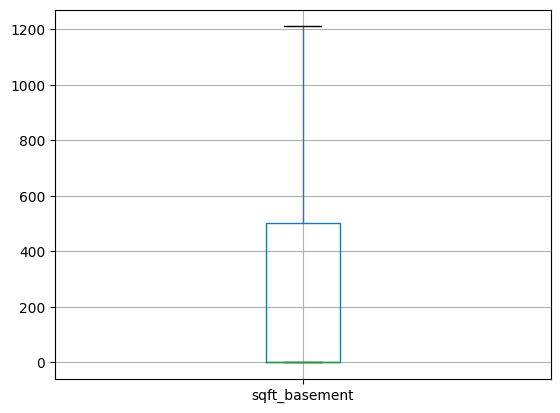

In [61]:
#Checking Outlier
House.boxplot(column=['sqft_basement'])
plt.show()

### **Boxplot Without Outliers**

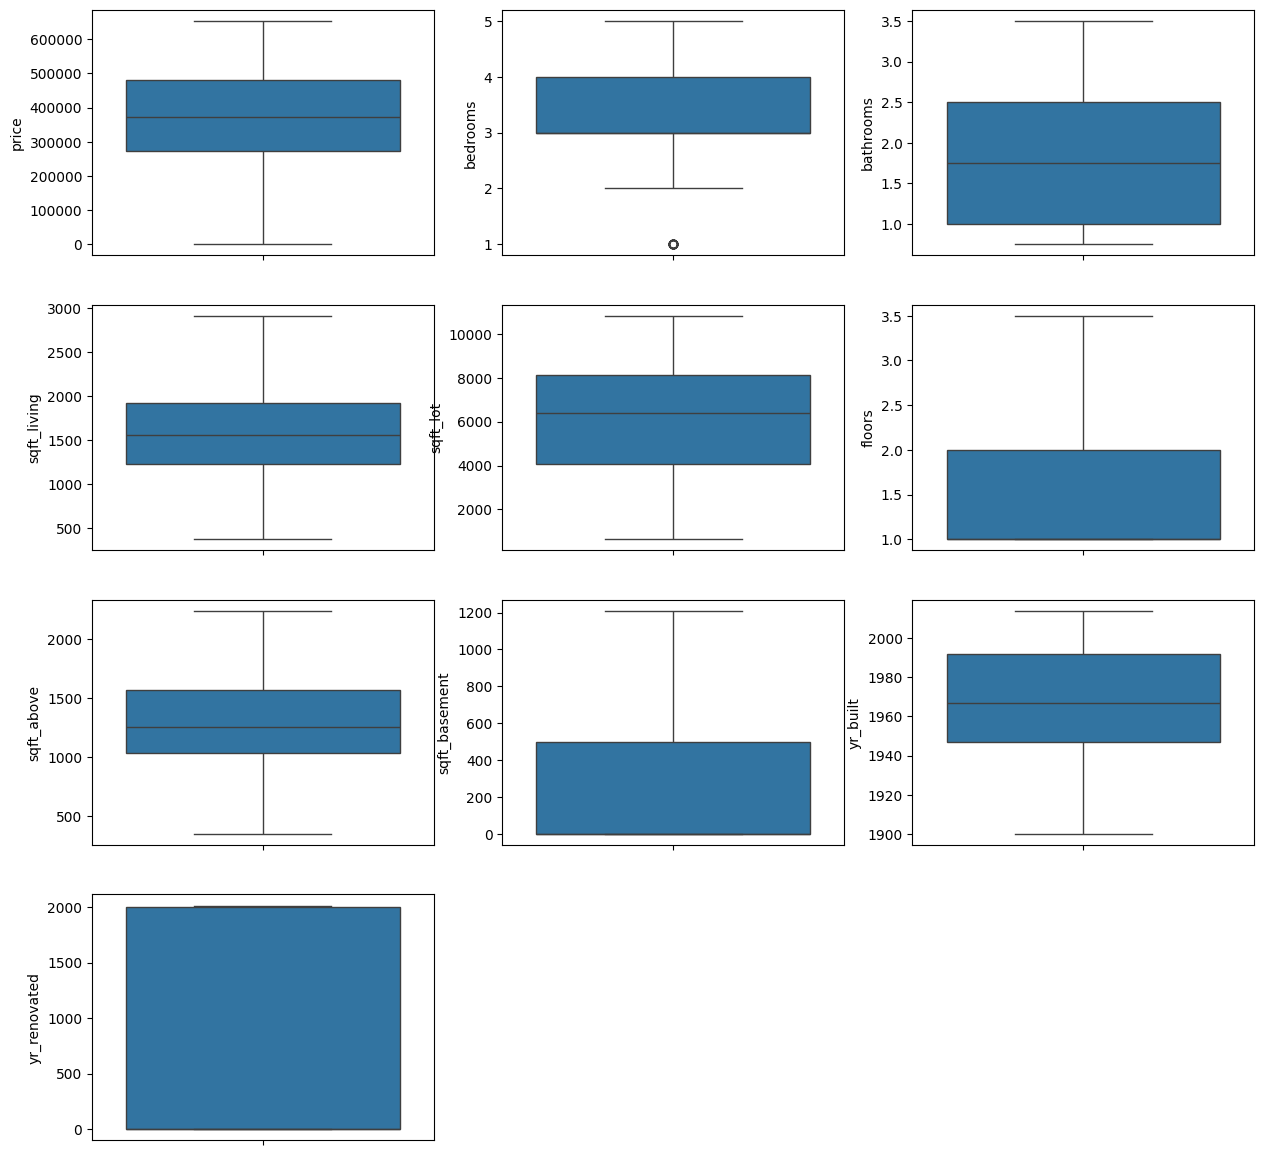

In [62]:
#Plotting Box Plot for numeric columns to check the outliers
plt.figure(figsize=(15,30))
for i in range(len(numeric_col.columns)):
  plt.subplot(8,3,i+1)
  sns.boxplot(y = numeric_col.columns[i],data = House)
plt.show()

In [63]:
House.shape

(2297, 18)

## **Removing Unwanted Columns after filteration**

In [64]:
House.shape

(2297, 18)

In [65]:
House.apply(lambda x: len(x.unique()))

date               70
price             920
bedrooms            5
bathrooms          12
sqft_living       268
sqft_lot         1465
floors              6
waterfront          1
view                5
condition           5
sqft_above        217
sqft_basement     125
yr_built          115
yr_renovated       53
street           2253
city               37
statezip           73
country             1
dtype: int64

In [66]:
House.apply(lambda x: x.unique())

date             [2014-05-02 00:00:00, 2014-05-03 00:00:00, 201...
price            [242500.0, 419000.0, 275000.0, 20000.0, 626000...
bedrooms                                           [3, 4, 2, 5, 1]
bathrooms        [1.5, 1.0, 2.25, 1.75, 2.5, 2.0, 3.25, 3.0, 2....
sqft_living      [1200.0, 1570.0, 1180.0, 1450.0, 1750.0, 2138....
sqft_lot         [9720.0, 6700.0, 10277.0, 8800.0, 1572.0, 6380...
floors                              [1.0, 2.5, 2.0, 1.5, 3.0, 3.5]
waterfront                                                    [No]
view                                               [0, 1, 2, 3, 4]
condition                                          [4, 3, 2, 5, 1]
sqft_above       [1200, 1570, 1180, 1450, 1470, 1130, 1360, 156...
sqft_basement    [0, 280, 470, 730, 1000, 670, 180, 750, 850, 3...
yr_built         [1965.0, 1956.0, 1983.0, 1954.0, 2005.0, 1959....
yr_renovated     [0, 2009, 1979, 1989, 2003, 2010, 1983, 1997, ...
street           [14034 SE 201st St, 15424 SE 9th St, 12425 41

In [67]:
# Removing 'waterfront' column since it has no useful information (all values same)
House.drop('waterfront', axis=1, inplace=True)

In [68]:
House.shape

(2297, 17)

# **3. Featured Engineering**

## **Featured Engineerings**

### 1. House Age

In [69]:
House['house_age'] = 2025 - House['yr_built']

* Represents how old the property is.

* Older houses may have lower prices unless renovated.

### 2. Renovation Age

In [70]:
House['renovation_age'] = House.apply(lambda x: 0 if x['yr_renovated']==0 else 2025 - x['yr_renovated'], axis=1)


* Indicates how long ago the last renovation was done.

* Helps identify properties that might have higher prices due to recent renovations.

### 3. Month from Date Column

In [71]:
House['month_sold'] = House['date'].dt.month

* Identifies which months have higher or lower property transactions, useful for trend analysis.
* Certain months may show higher average house prices due to demand fluctuations (e.g., summer peaks).


### 4. Price per Square Foot

In [72]:
House['price_per_sqft'] = House['price'] / House['sqft_living']

* Normalizes the price based on house size for better comparisons.

## **Statistical Analysis**

### Descriptive Analysis

In [73]:
House.describe()

date          price     bedrooms    bathrooms  \
count                           2297    2297.000000  2297.000000  2297.000000   
mean   2014-06-06 15:17:09.690901248  378099.355612     3.077492     1.831193   
min              2014-05-02 00:00:00       0.000000     1.000000     0.750000   
25%              2014-05-20 00:00:00  272500.000000     3.000000     1.000000   
50%              2014-06-09 00:00:00  372500.000000     3.000000     1.750000   
75%              2014-06-24 00:00:00  480000.000000     4.000000     2.500000   
max              2014-07-10 00:00:00  654000.000000     5.000000     3.500000   
std                              NaN  132478.737897     0.784266     0.633946   

       sqft_living      sqft_lot       floors   sqft_above  sqft_basement  \
count  2297.000000   2297.000000  2297.000000  2297.000000     2297.00000   
mean   1572.814471   6079.016543     1.402699  1326.391815      241.51589   
min     370.000000    638.000000     1.000000   350.000000        0.00000   
25%    1220.000000   4060.000000     1.000000  1040.000000        0.00000   
50%    1560.000000   6380.000000     1.000000  1260.000000        0.00000   
75%    1920.000000   8128.000000     2.000000  1570.000000      500.00000   
max    2910.000000  10834.000000     3.500000  2242.000000     1210.00000   
std     449.917185   2682.553204     0.554127   380.441111      343.72699   

          yr_built  yr_renovated    house_age  renovation_age   month_sold  \
count  2297.000000   2297.000000  2297.000000     2297.000000  2297.000000   
mean   1966.596865    858.196343    58.403135       12.809316     5.741837   
min    1900.000000      0.000000    11.000000        0.000000     5.000000   
25%    1947.000000      0.000000    33.000000        0.000000     5.000000   
50%    1967.000000      0.000000    58.000000        0.000000     6.000000   
75%    1992.000000   1999.000000    78.000000       22.000000     6.000000   
max    2014.000000   2014.000000   125.000000      113.000000     7.000000   
std      30.173920    988.114109    30.173920       19.306650     0.685181   

       price_per_sqft  
count     2297.000000  
mean       254.119579  
min          0.000000  
25%        176.405229  
50%        242.579602  
75%        312.140488  
max        745.945946  
std        100.995425

In [74]:
stats_summary = pd.DataFrame({
    "Mean": House.mean(numeric_only=True),
    "Median": House.median(numeric_only=True),
    "Mode": House.mode(numeric_only=True).iloc[0],
    "Std Dev": House.std(numeric_only=True)
})

print(stats_summary)

                         Mean         Median      Mode        Std Dev
price           378099.355612  372500.000000  300000.0  132478.737897
bedrooms             3.077492       3.000000       3.0       0.784266
bathrooms            1.831193       1.750000       1.0       0.633946
sqft_living       1572.814471    1560.000000    1720.0     449.917185
sqft_lot          6079.016543    6380.000000    5000.0    2682.553204
floors               1.402699       1.000000       1.0       0.554127
sqft_above        1326.391815    1260.000000    1010.0     380.441111
sqft_basement      241.515890       0.000000       0.0     343.726990
yr_built          1966.596865    1967.000000    2006.0      30.173920
yr_renovated       858.196343       0.000000       0.0     988.114109
house_age           58.403135      58.000000      19.0      30.173920
renovation_age      12.809316       0.000000       0.0      19.306650
month_sold           5.741837       6.000000       6.0       0.685181
price_per_sqft     2

**Summary of Descriptive Statistics**

* **Price**:

  * Average house price is around **₹378K**, with a median of **₹372.5K**.
  * Most common price (mode) is **₹300K**.
  * Large variability is observed (Std. Dev ≈ ₹132K).

* **Bedrooms & Bathrooms**:

  * Typical houses have **3 bedrooms** and around **2 bathrooms**.
  * Bedroom count ranges mainly from **2–4**, while bathrooms are mostly **1–2.5**.

* **Living Area & Lot Size**:

  * Average living space is **\~1,573 sqft**, with a median of **1,560 sqft**.
  * Most common lot size is **5,000 sqft**, but the mean is **6,079 sqft**, indicating some large-lot outliers.

* **Floors**:

  * Majority of homes are **single-floor** (median = 1), with a mean ≈ 1.4.

* **Above Ground & Basement Areas**:

  * Average above-ground area is **1,326 sqft**, mode is **1,010 sqft**.
  * Many homes have **no basement** (median = 0), though some reach up to **1,210 sqft**.

* **Year Built & Age**:

  * Median construction year is **1967**.
  * Average house age is **\~58 years**, with the mode at **19 years** (likely due to clusters of modern homes).

* **Renovation**:

  * Most homes were **never renovated** (median = 0).
  * Average renovation age ≈ **13 years**, but the distribution is skewed due to many zeros.

* **Month Sold**:

  * Most homes were sold in **June (mode = 6)**.
  * Sales mainly occur in **May–July**.

* **Price per Sqft**:

  * Average is **₹254/sqft**, with a median of **₹243/sqft**.
  * High standard deviation (\~₹101/sqft) shows wide variation depending on location, size, and condition.

### T-Test: Average Price Difference by House Condition

In [75]:
# Group prices by condition
cond3 = House[House['condition'] == '3']['price']
cond4 = House[House['condition'] == '4']['price']

# Perform independent samples t-test
t_stat, p_val = stats.ttest_ind(cond3, cond4, equal_var=False)

print("T-Test between Condition 3 and Condition 4:")
print(f"T-statistic = {t_stat:.3f}, P-value = {p_val:.5f}")

if p_val < 0.05:
    print("✅ Reject Null Hypothesis → Prices differ significantly by condition.")
else:
    print("❌ Fail to Reject Null Hypothesis → No significant price difference by condition.")


T-Test between Condition 3 and Condition 4:
T-statistic = nan, P-value = nan
❌ Fail to Reject Null Hypothesis → No significant price difference by condition.


### Chi-Square Test (View vs Condition)

In [76]:
# Create contingency table
contingency_table = pd.crosstab(House['view'], House['condition'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test: View vs Condition")
print("\nExpected Frequencies (calculated):\n", expected)
print(f"\nChi-Square Statistic = {chi2_stat:.2f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p_val:.5f}")

# Critical value at 95% confidence
alpha = 0.05
critical = chi2.ppf(1 - alpha, dof)
print(f"Critical Value (α=0.05, df={dof}) = {critical:.2f}")

# Decision based on test statistic vs critical value
if chi2_stat > critical:
    print("✅ Reject Null Hypothesis → View and Condition are associated.")
else:
    print("❌ Fail to Reject Null Hypothesis → View and Condition are independent.")


Chi-Square Test: View vs Condition

Expected Frequencies (calculated):
 [[1.92337832e+00 1.44253374e+01 1.34444145e+03 6.48178494e+02
  2.00031345e+02]
 [1.65433174e-02 1.24074880e-01 1.15637788e+01 5.57509795e+00
  1.72050501e+00]
 [4.61471485e-02 3.46103613e-01 3.22568568e+01 1.55515890e+01
  4.79930344e+00]
 [1.13191119e-02 8.48933391e-02 7.91205921e+00 3.81454071e+00
  1.17718764e+00]
 [2.61210274e-03 1.95907706e-02 1.82585982e+00 8.80278624e-01
  2.71658685e-01]]

Chi-Square Statistic = 10.13
Degrees of Freedom = 16
P-value = 0.85955
Critical Value (α=0.05, df=16) = 26.30
❌ Fail to Reject Null Hypothesis → View and Condition are independent.


Interpretation:

* If p < 0.05 → House condition depends on view rating (e.g., better views may correlate with better condition ratings).

* If p ≥ 0.05 → No strong link between condition and view.

# **4. EDA (Exploratory Data Analysis)**

In [77]:
set(House)

{'bathrooms',
 'bedrooms',
 'city',
 'condition',
 'country',
 'date',
 'floors',
 'house_age',
 'month_sold',
 'price',
 'price_per_sqft',
 'renovation_age',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_lot',
 'statezip',
 'street',
 'view',
 'yr_built',
 'yr_renovated'}

In [78]:
House.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297 entries, 15 to 4599
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2297 non-null   datetime64[ns]
 1   price           2297 non-null   float64       
 2   bedrooms        2297 non-null   int64         
 3   bathrooms       2297 non-null   float64       
 4   sqft_living     2297 non-null   float64       
 5   sqft_lot        2297 non-null   float64       
 6   floors          2297 non-null   float64       
 7   view            2297 non-null   object        
 8   condition       2297 non-null   object        
 9   sqft_above      2297 non-null   int64         
 10  sqft_basement   2297 non-null   int64         
 11  yr_built        2297 non-null   float64       
 12  yr_renovated    2297 non-null   int64         
 13  street          2297 non-null   object        
 14  city            2297 non-null   object        
 15  statezip

In [79]:
#Numeric Columns
numeric_col = House.select_dtypes(include=['number'])
print(numeric_col.dtypes)

price             float64
bedrooms            int64
bathrooms         float64
sqft_living       float64
sqft_lot          float64
floors            float64
sqft_above          int64
sqft_basement       int64
yr_built          float64
yr_renovated        int64
house_age         float64
renovation_age      int64
month_sold          int32
price_per_sqft    float64
dtype: object


## **Data Attributes**

### 🔹 Continuous (Numeric) Variables

* **price** – Price of the house (target variable).
* **bedrooms** – Number of bedrooms.
* **bathrooms** – Number of bathrooms.
* **sqft\_living** – Living area (in square feet).
* **sqft\_lot** – Lot size (in square feet).
* **floors** – Number of floors.
* **sqft\_above** – Square feet above ground.
* **sqft\_basement** – Square feet of the basement.
* **house_age** – Represents how old the property is.
* **renovation_age** – Indicates how long ago the last renovation was done.
* **month_sold** – Can help analyze seasonality (e.g., more sales in summer months)
* **price_per_sqft** – Normalizes the price based on house size for better comparisons.

---

### 🔹 Categorical Variables

* **view** – Quality of the view from the house (0–4).
* **condition** – Overall condition of the house (1–5).
* **street** – Street name of the property.
* **city** – City where the house is located.
* **statezip** – State and zip code combined.
* **country** – Country of the property.

---

### 🔹 Date / Time Variable

* **date** – Date the house was sold (converted to datetime).
* **yr_built** – Year the house was built.
* **yr_renovated** – Year of last renovation.



## **UNIVARIATE ANALYSIS**

### **Count Plot for Bedrooms**

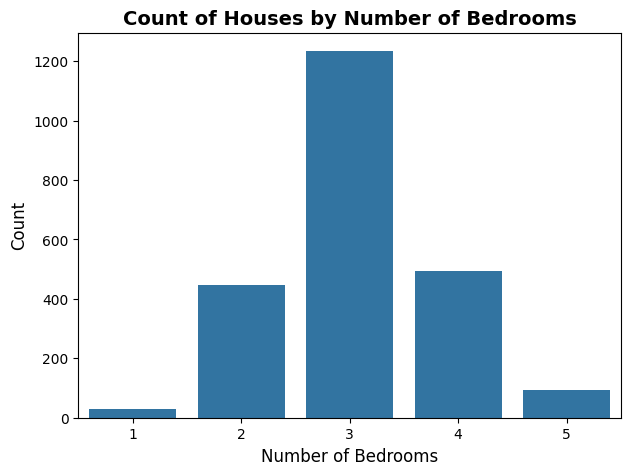

In [80]:
#Countplot for 'bedrooms'
plt.figure(figsize=(7,5))
sns.countplot(x='bedrooms', data=House)
plt.title("Count of Houses by Number of Bedrooms", fontsize=14, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


**Inference -**
*   The majority of houses have 3 bedrooms (~1,200 houses), making it the most in demand.
*   2- and 4-bedroom houses are also frequent, while 1- and 5-bedroom houses are rare.

### **Histogram Plot for 'Price'**

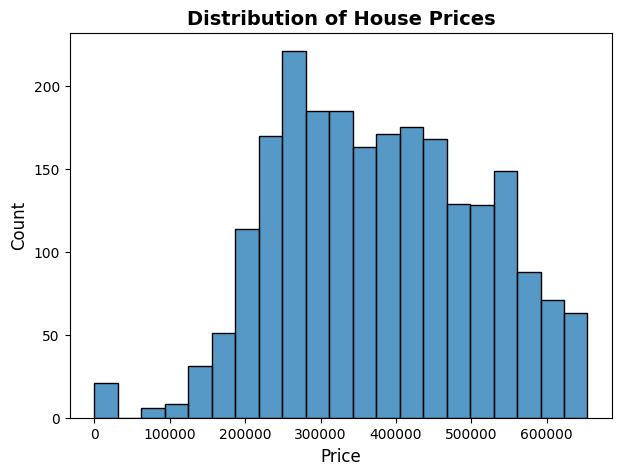

In [81]:
plt.figure(figsize=(7,5))
sns.histplot(House['price'])
plt.title("Distribution of House Prices", fontsize= 14, fontweight= 'bold')
plt.xlabel("Price", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

**Inference -**
Most of the houses are issued for amount 2,50,000 approx.

### **Box Plot for 'Sqft Living'**

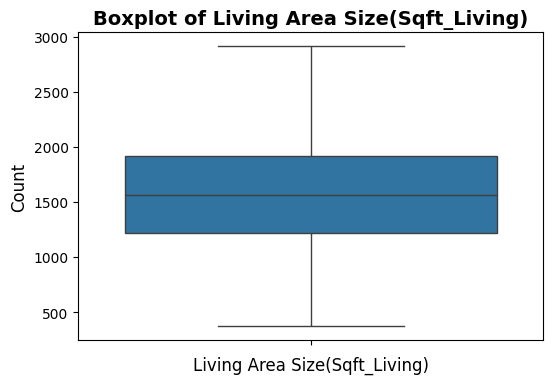

In [82]:
plt.figure(figsize=(6,4))
sns.boxplot(y=House['sqft_living'])
plt.title("Boxplot of Living Area Size(Sqft_Living)", fontsize=14, fontweight='bold')
plt.xlabel("Living Area Size(Sqft_Living)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


**Inference -**


* Living Area sizes vary widely, with most between 1,100 – 2,000 sqft.
* Median Living Area size is around 1,500 sqft.



### **Count Plot for Condition**

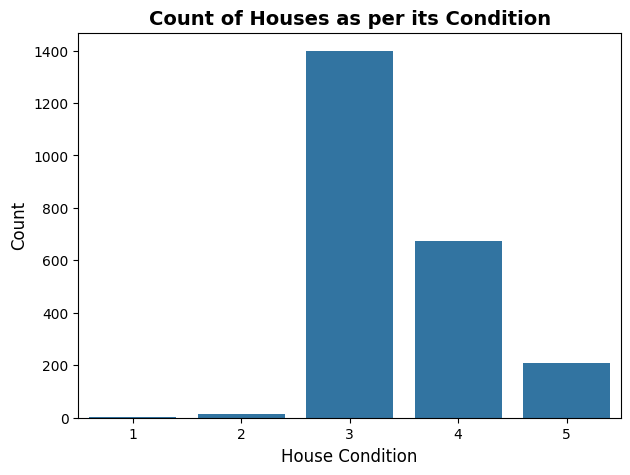

In [83]:
#Countplot for 'bedrooms'
plt.figure(figsize=(7,5))
sns.countplot(x='condition', data=House)
plt.title("Count of Houses as per its Condition", fontsize=14, fontweight='bold')
plt.xlabel("House Condition", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

**Inference -** Most of the houses are under the condition level of 3

## **BIVARIATE ANALYSIS**

### **Scatter Plot for 'Sqft_living vs price'**

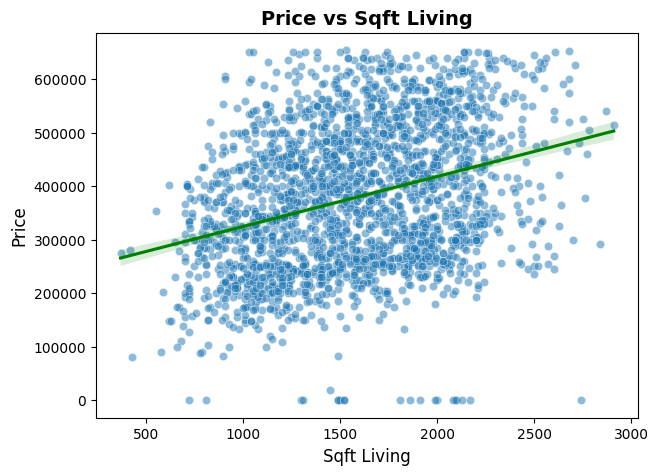

In [84]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='sqft_living',
    y='price',
    data=House,
    alpha=0.5)
sns.regplot(
    x='sqft_living',
    y='price',
    data=House,
    scatter=False,
    color='green',
)
plt.title("Price vs Sqft Living", fontsize=14, fontweight='bold')
plt.xlabel("Sqft Living", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

**Inference -**
*   There is a positive correlation between living area and price.
*   Larger houses (higher sqft_living) generally have higher prices, though there are some expensive outliers even for smaller houses.

### **Box Plot for 'view vs Price'**

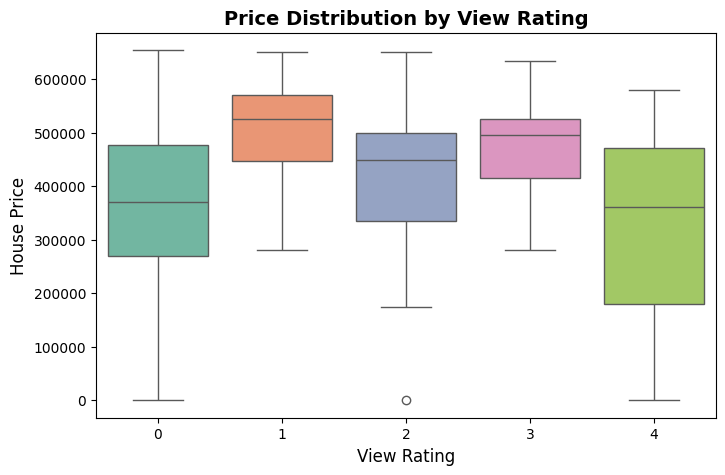

In [85]:
# Price Distribution by View Rating

plt.figure(figsize=(8,5))

sns.boxplot(
    x='view',
    y='price',
    data=House,
    order=sorted(House['view'].unique()),   # corrected ordering
    palette='Set2',                         # soft, clear colors
)

plt.title("Price Distribution by View Rating", fontsize=14, fontweight='bold')
plt.xlabel("View Rating", fontsize=12)
plt.ylabel("House Price", fontsize=12)
plt.show()


**Inference -**
* Higher view ratings do not consistently lead to higher prices — the median price is actually highest for view rating 1.
* View rating 4 shows the widest price variability, including low-end outliers.
* Overall, price doesn't strongly correlate with view rating, suggesting view alone isn't a primary price driver.

### **Bar Plot for 'condition vs bathrooms'**

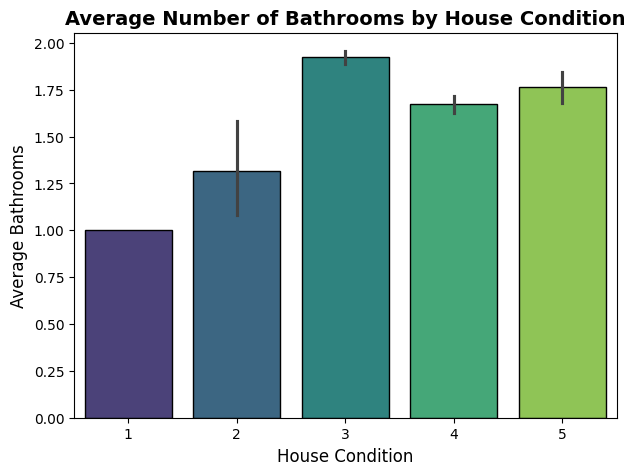

In [86]:
# Analysing Condition of Bathrooms

# Analysing Condition of Bathrooms

plt.figure(figsize=(7,5))

sns.barplot(
    x='condition',
    y='bathrooms',
    data=House,
    palette='viridis',         # modern color palette
    edgecolor='black'          # outline bars for clarity
)
plt.title("Average Number of Bathrooms by House Condition", fontsize=14, fontweight='bold')
plt.xlabel("House Condition", fontsize=12)
plt.ylabel("Average Bathrooms", fontsize=12)
plt.show()


**Inference -**
* Average number of bathrooms increases with better condition, peaking at condition 3.
* Condition 3 has the highest average bathrooms, followed closely by conditions 5 and 4.
* Homes in poorer condition (1 and 2) tend to have fewer bathrooms, suggesting smaller or older homes.


### **Scatter Plot for 'Price vs Number of bedrooms'**

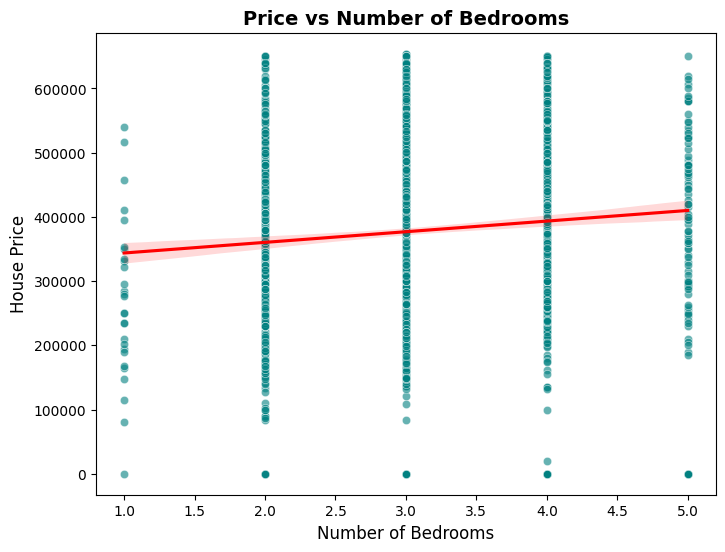

In [87]:
# Price vs Number of Bedrooms

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='bedrooms',
    y='price',
    data=House,
    alpha=0.6,
    color='teal',
)
sns.regplot(
    x='bedrooms',
    y='price',
    data=House,
    scatter=False,
    color='red',
)

plt.title("Price vs Number of Bedrooms", fontsize=14, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=12)
plt.ylabel("House Price", fontsize=12)
plt.show()


**Inference -** Most of the houses are under the condition level of 3

### **House Price Trend Over Months**

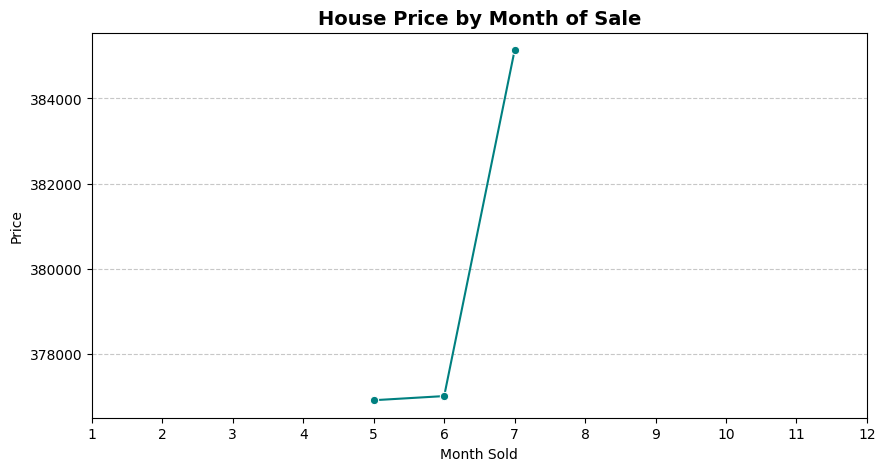

In [88]:
plt.figure(figsize=(10,5))
sns.lineplot(x='month_sold', y='price', data=House, ci=None, marker='o', color='teal')
plt.title("House Price by Month of Sale", fontsize=14, fontweight='bold')
plt.xlabel("Month Sold")
plt.ylabel("Price")
plt.xticks(range(1,13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Inference -**
* The graph shows the **average house price trend by month of sale**.
* House prices remain nearly stable in **May and June**, with only a slight increase.
* A significant **spike in average prices is observed in July**, reaching the highest point among the shown months.
* No data points are displayed for other months, which may indicate filtered records.


## **MULTI-VARIATES ANALYSIS**

### **Pair Plot for House**

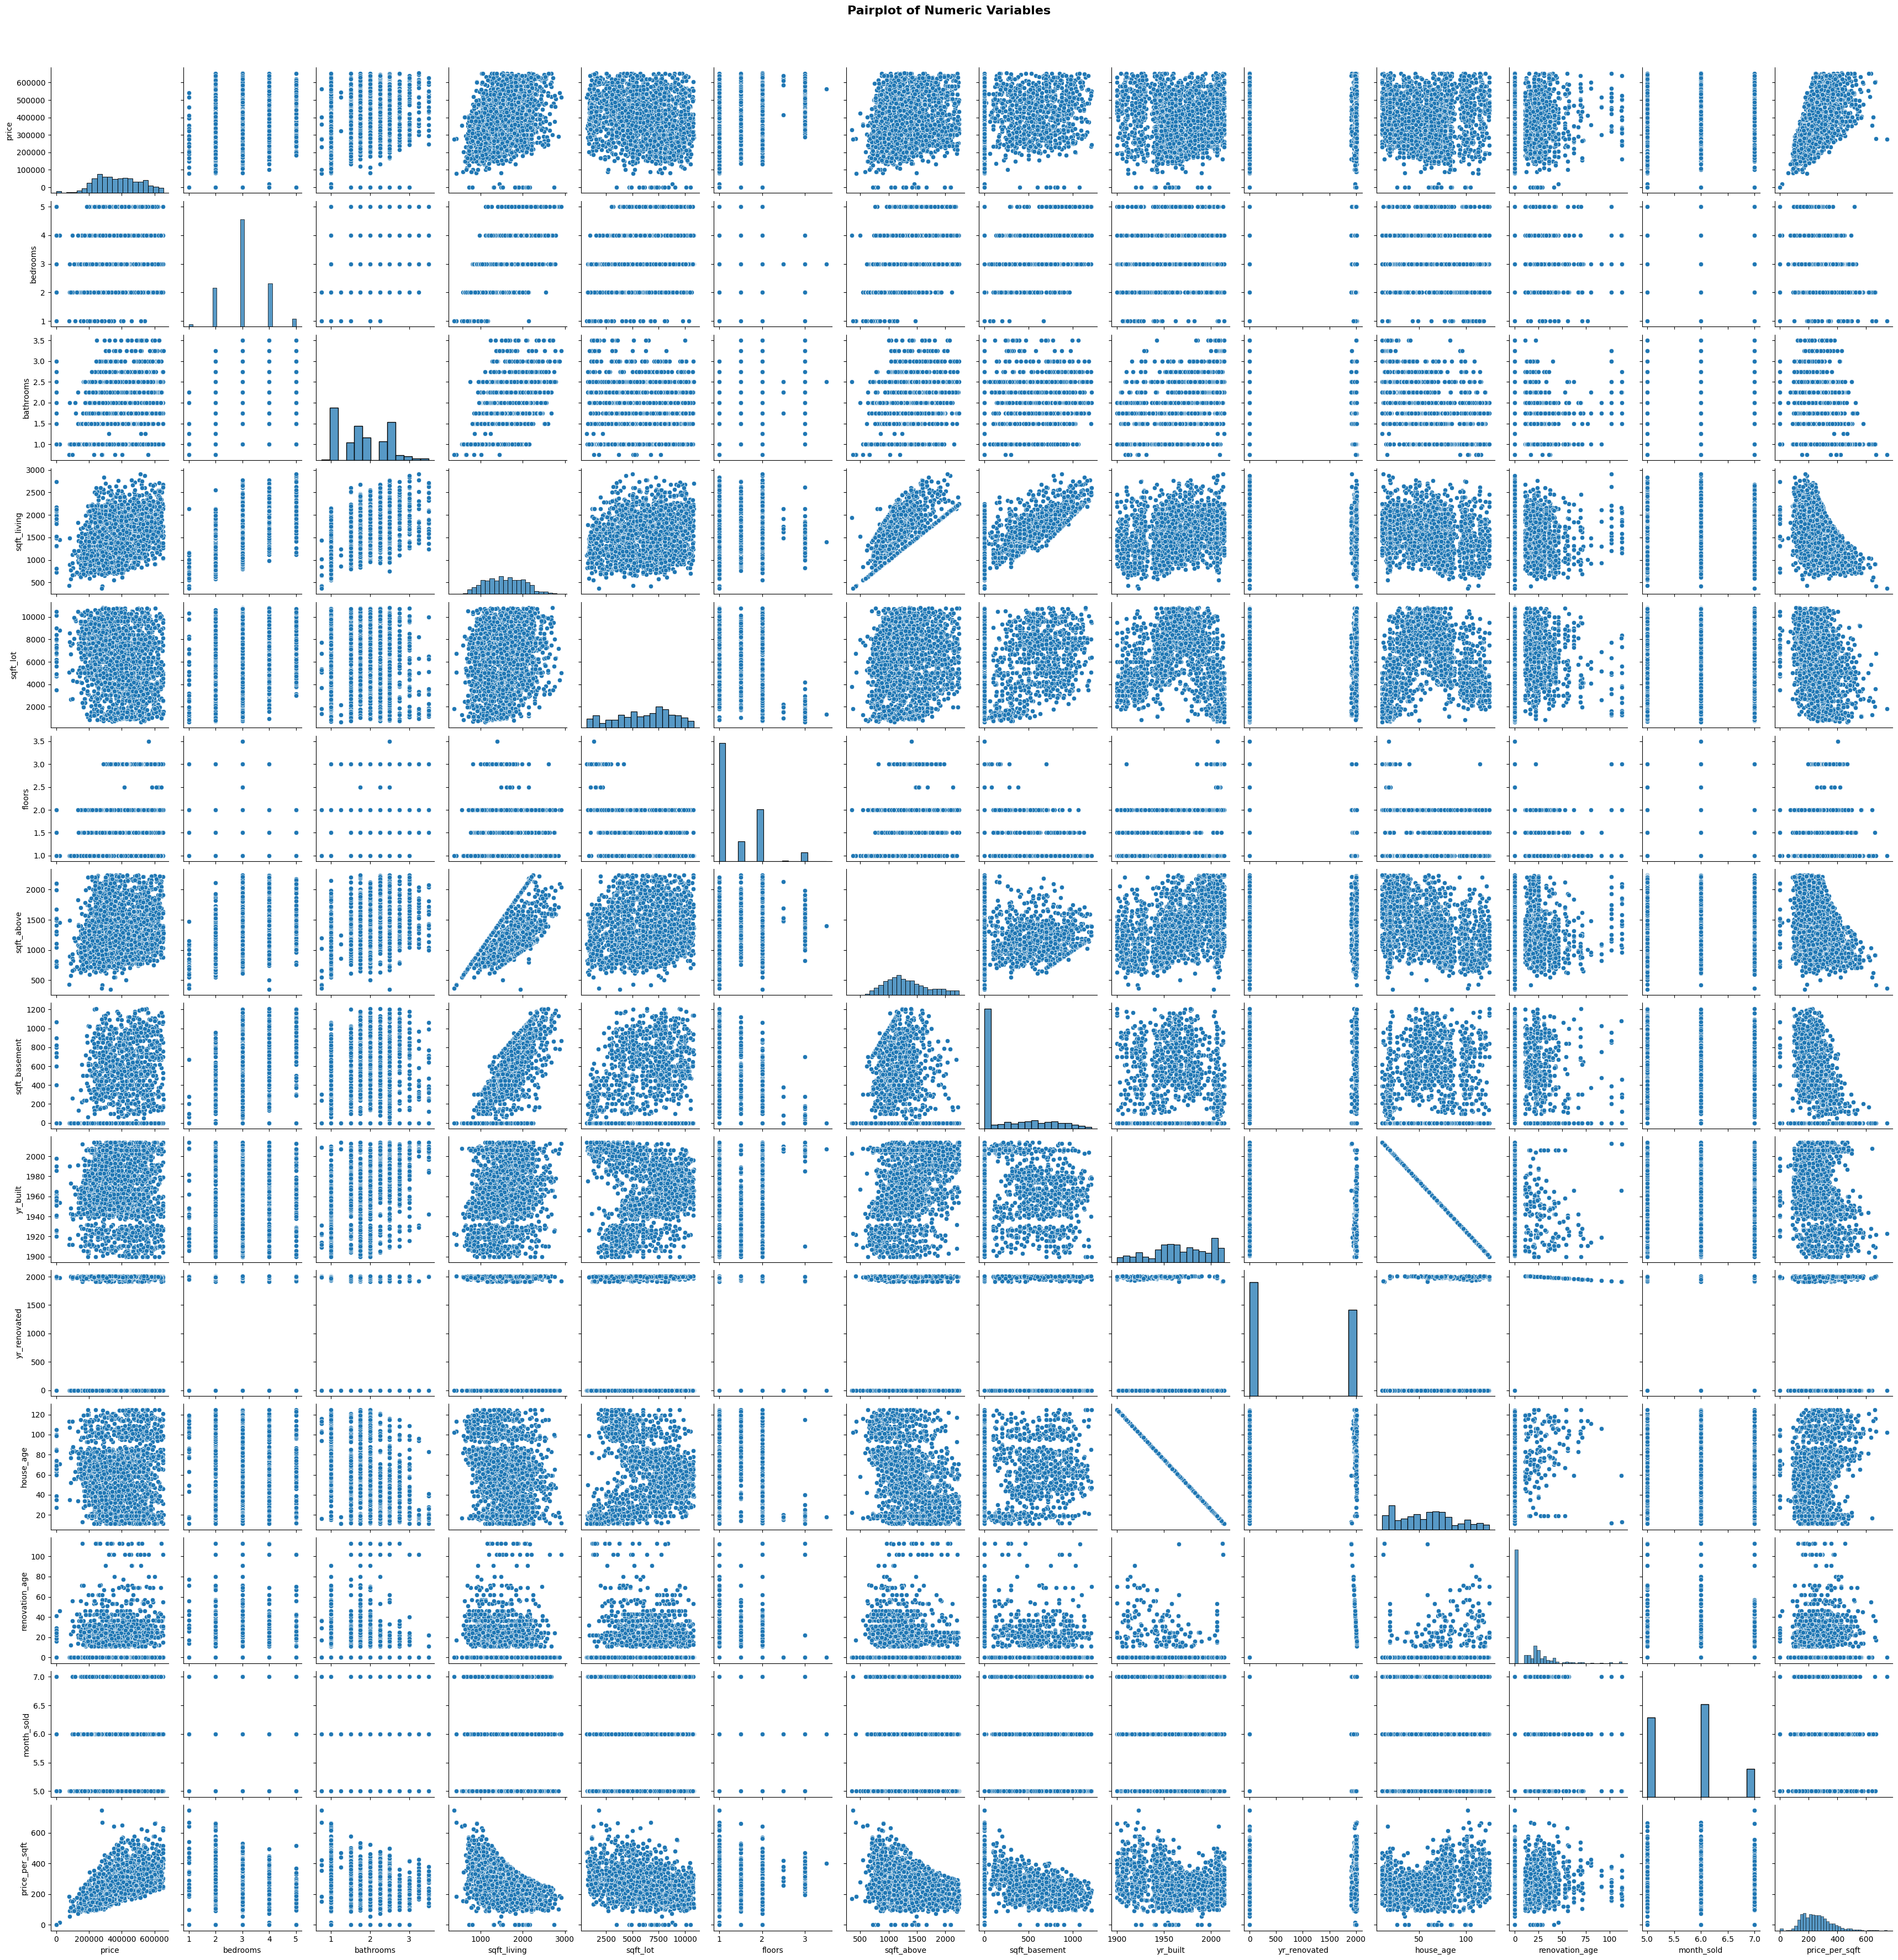

In [89]:
sns.pairplot(
    numeric_col,
    palette='viridis'
)

plt.suptitle("Pairplot of Numeric Variables", fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Inference -**

* The variables **sqft\_living** and **sqft\_above** are highly correlated as sqft\_above is a major part of the living area.
* **sqft\_living** shows a strong positive linear relationship with **price**, while **sqft\_basement** also contributes but with weaker impact.
* **Bedrooms** and **bathrooms** show weak positive correlation with **price** compared to square footage variables.
* Most houses have **3–4 bedrooms**, **2–3 bathrooms**, and **1–2 floors** as observed from histograms.
* The distribution of **price** is right-skewed, indicating that a majority of houses fall in lower price ranges, with few very expensive outliers.


### **Correlation of Numeric Variables**

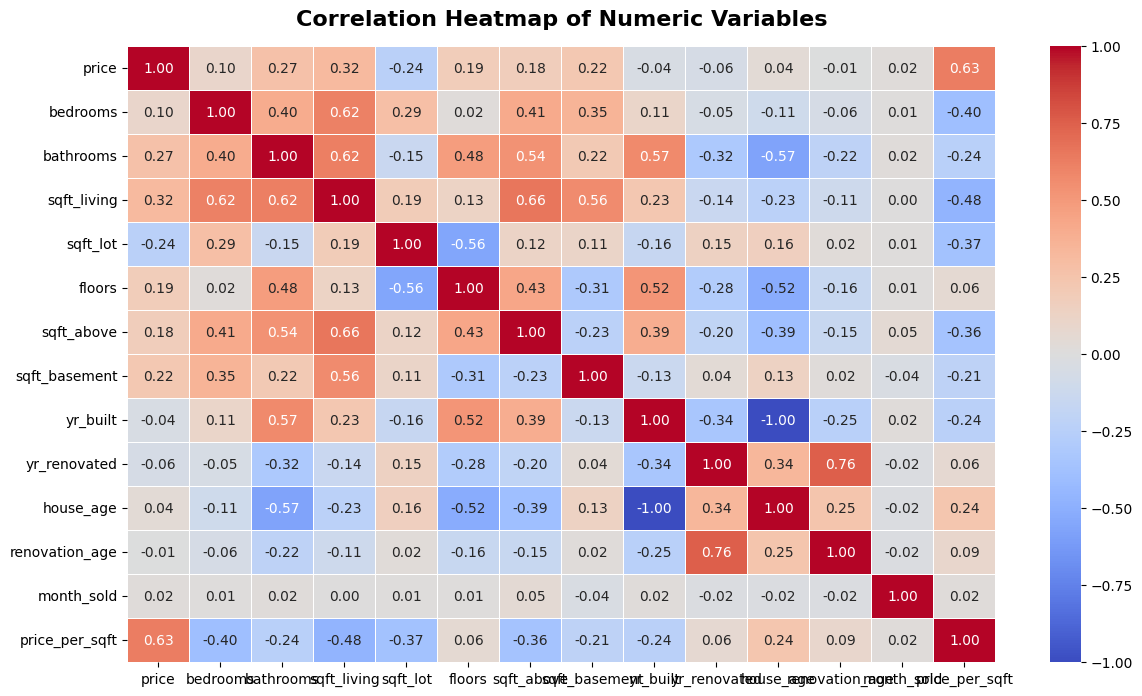

In [90]:
# Analysing Correlation of Numeric Variables in 'House' DataFrame

plt.figure(figsize=(14,8))

sns.heatmap(
    numeric_col.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numeric Variables", fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()

**Inference -**
* The Target Variate **'Price'** is **Positively** correlated with **'bedrroms', 'bathrooms', 'sqft_living', 'sqft_basement** and **'sqft_lot'**
*
* The Target Variate **'Price'** is **Negitively** correlated with **'sqft_above'** and **'floor'**
* **'sqft_living'** and **'bedrooms'** are strongly correlated.


# **5. Key Insights**

### **Insights Obtained from Univariate Analysis**

---

* The majority of houses have **3 bedrooms (\~1,200 houses)**, making them the most in demand.

* **2- and 4-bedroom houses** are also frequent, while **1- and 5+ bedroom houses** are rare.

* Most of the houses are priced around **₹2,50,000**, with a concentration in the **200,000 – 400,000 range**.

* A few very expensive houses act as outliers, skewing the price distribution to the right.

* Living areas vary widely, with most houses between **1,100 – 2,000 sqft**.

* The median living area is around **1,500 sqft**, which reflects a standard mid-sized family home.

* Some large luxury homes (>4,000 sqft) exist, but they are uncommon.

* Most houses are rated at **condition level 3 (average)**.

* Very few houses are rated at **level 1 (poor)** or **level 5 (excellent)**, showing the dataset is dominated by average-condition properties.


### **Insights Obtained from Bivariate Analysis**

---

* There is a **positive correlation** between living area and price.

* Larger houses (higher `sqft_living`) generally have higher prices, though some expensive outliers exist even for smaller houses.

* Higher **view ratings** do not consistently lead to higher prices — the median price is actually highest for **view rating 1**.

* **View rating 4** shows the widest price variability, including low-end outliers.

* Overall, price does not strongly correlate with view rating, suggesting **view alone isn’t a primary price driver**.

* The **average number of bathrooms** increases with better condition, peaking at **condition 3**.

* Condition 3 has the **highest average bathrooms**, followed closely by conditions 5 and 4.

* Homes in **poorer condition (1 and 2)** tend to have fewer bathrooms, suggesting smaller or older homes.

* The graph shows the **average house price trend by month of sale**.

* House prices remain nearly stable in **May and June**, with only a slight increase.

* A significant **spike in average prices is observed in July**, reaching the highest point among the shown months.

* No data points are displayed for other months, which may indicate filtered records.


### **Insights Obtained from Multi Variate Analysis**

---

* The variables **sqft\_living** and **sqft\_above** are highly correlated as sqft\_above is a major part of the living area.
* **sqft\_living** shows a strong positive linear relationship with **price**, while **sqft\_basement** also contributes but with weaker impact.
* **Bedrooms** and **bathrooms** show weak positive correlation with **price** compared to square footage variables.
* Most houses have **3–4 bedrooms**, **2–3 bathrooms**, and **1–2 floors** as observed from histograms.
* The distribution of **price** is right-skewed, indicating that a majority of houses fall in lower price ranges, with few very expensive outliers.
* The Target Variate **'Price'** is **Positively** correlated with **'bedrroms', 'bathrooms', 'sqft_living', 'sqft_basement** and **'sqft_lot'**
* The Target Variate **'Price'** is **Negitively** correlated with **'sqft_above'** and **'floor'**
* **'sqft_living'** and **'bedrooms'** are strongly correlated.

# **6. RECOMMENDATIONS**


---

* Since the **majority of houses have 3 bedrooms**, real estate developers should continue to focus on building 3-bedroom homes, as they represent the most demanded category.

* Houses with **larger living areas (`sqft_living`) command higher prices**, so property owners planning to sell should highlight spacious layouts, while buyers with budget constraints may target compact homes to find better deals.

* **Condition 3 houses** dominate the dataset, but better-condition houses (levels 4–5) yield slightly higher prices. Renovation and maintenance could therefore improve resale value, especially for homes currently rated as condition 1 or 2.

* **View rating alone** does not strongly influence price, except in rare cases (e.g., view rating 4 showing wide variability). This suggests buyers should not overpay purely for “view” unless accompanied by other quality features.

* **Bathrooms** positively impact value, with most homes having 2–3. However, adding excessive bathrooms beyond this range may not significantly raise price. Builders should balance cost vs. benefit when designing floorplans.

* From the **monthly sales trend**, prices tend to **peak around July**, suggesting seasonality effects. Sellers could list homes in late spring or early summer for higher returns, while buyers may find relatively stable prices earlier in the year (May–June).

* Since the dataset shows **right-skewed prices** with many affordable homes and few very expensive ones, first-time buyers or mid-range investors may focus on the large pool of budget-friendly properties, while luxury investors should analyze the unique outlier segment.
